In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True) 
sns.set(font_scale=1.5) 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [3]:
# Read training dataset
df_train = pd.read_csv('titanic_train.csv')
print("Training dataset shape:", df_train.shape)

Training dataset shape: (891, 12)


In [4]:
# Investigate different values per column of the Survived column
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# Count how many people of each gender there are
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
# Count how many occurrences for the Embarked column there are
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# Check for missing values in the training set
df_train.isnull().sum()

# There are missing values in Age and Cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Drop irrelevant columns
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# Function to deal with missing values of Age variable, by assigning values according to passenger class according to the each class mean
def age_approx(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else: 
      return 24
  else:
    return Age

In [11]:
# Show the mean of its column grouped by Pclass
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [12]:
# Remove null values according to the rules defined in the function
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)

In [13]:
# Check if there are still null values on the Age column
df_train.isnull().sum()

# There aren't but there are still null values in the Embarked column

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
# Drop null values from the Embarked column
df_train.dropna(inplace=True)

# Double-check if there are still null values in the dataset
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
# Check the data types of the training set columns
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [17]:
# Convert the categorical variables Sex and Embarked into numeric ones
df_train_dummied = pd.get_dummies(df_train, columns=['Sex'])
df_train_dummied = pd.get_dummies(df_train_dummied, columns=['Embarked'])
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


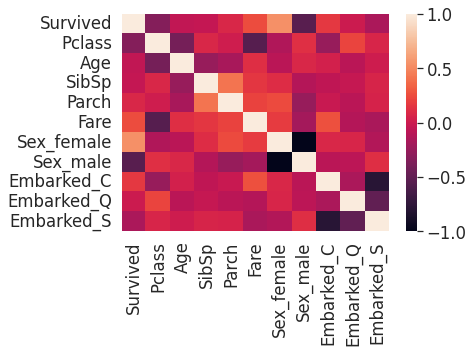

In [18]:
# Find possible correlations between the variables
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

Modelling

In [19]:
# Assign the independent and dependent variables
used_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Training set features' shape:", X_train.shape)
print("Test set features' shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Test set target shape:", y_test.shape)

Training set features' shape: (622, 9)
Test set features' shape: (267, 9)
Training set target shape: (622,)
Test set target shape: (267,)


In [23]:
# Instantiate and train the model
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

# Predict the model outcomes
y_pred = LogReg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Get the confusion matrix of the model
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test,y_pred))

Confusion matrix:
[[143  23]
 [ 22  79]]


In [25]:
# Get the accuracy score of the model
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8314606741573034


In [27]:
# Get the classification report of the model
print("Classification report:")
print(" ")
print(classification_report(y_test,y_pred))

Classification report:
 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [28]:
# Get the coefficients and intercept of the function
print("Coefficients:", LogReg.coef_)
print("Intercept:", LogReg.intercept_)

Coefficients: [[-1.04158875 -0.03983791 -0.24164894 -0.04036284  1.19459667 -1.19437717
   0.34571376 -0.03446633 -0.31102793]]
Intercept: [3.65307861]


In [29]:
# Further check the algorithm's predicted probabilities per person - survived vs not survived
LogReg.predict_proba(X_test)

array([[0.26516281, 0.73483719],
       [0.39622692, 0.60377308],
       [0.94731558, 0.05268442],
       [0.2590262 , 0.7409738 ],
       [0.94394814, 0.05605186],
       [0.13481001, 0.86518999],
       [0.33296644, 0.66703356],
       [0.51840603, 0.48159397],
       [0.78238293, 0.21761707],
       [0.407069  , 0.592931  ],
       [0.7398449 , 0.2601551 ],
       [0.21228987, 0.78771013],
       [0.74853299, 0.25146701],
       [0.14548545, 0.85451455],
       [0.86454066, 0.13545934],
       [0.36924736, 0.63075264],
       [0.89406721, 0.10593279],
       [0.2973491 , 0.7026509 ],
       [0.17609946, 0.82390054],
       [0.3999398 , 0.6000602 ],
       [0.90481481, 0.09518519],
       [0.5526016 , 0.4473984 ],
       [0.86416764, 0.13583236],
       [0.93727874, 0.06272126],
       [0.51742233, 0.48257767],
       [0.51552543, 0.48447457],
       [0.03932822, 0.96067178],
       [0.8691387 , 0.1308613 ],
       [0.89796834, 0.10203166],
       [0.32468303, 0.67531697],
       [0.